In [1]:
import numpy as np
import pandas as pd

In [4]:


malicious = pd.read_excel(r'C:\Users\nivet\Downloads\petsi project\mal.xlsx')


In [5]:
malicious

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
994,be.linkedin.com/pub/jan-roels/27/141/746,benign
995,youtube.com/watch?v=EcGsM-PNQHQ,benign
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,benign
997,http://www.slavia.sk/home,defacement


In [6]:
malicious.shape

(999, 2)

In [7]:
malicious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     999 non-null    object
 1   type    999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [8]:
malicious.columns

Index(['url', 'type'], dtype='object')

In [9]:
malicious['url'].fillna('url', inplace=True)


In [10]:
malicious['type'].fillna('type', inplace=True)


In [11]:
malicious.isnull().sum()

url     0
type    0
dtype: int64

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
malicious['url']=label_encoder.fit_transform(malicious['url'])
malicious['url'].unique()

array([105, 742, 104, 511, 339, 355, 231, 983, 562,  29, 164, 526, 765,
       537, 593, 397, 813, 779, 926, 604,  77, 852,   1, 780, 229, 862,
       132, 386, 540, 218, 859, 796, 720, 959, 938, 422, 740, 170, 464,
       570, 613, 811, 642,  59, 639, 879, 371, 867, 970, 391, 556, 530,
        31, 298, 136, 822, 692, 884,  17, 169, 471, 580, 939, 146,  14,
       529, 549, 821, 547, 626, 794, 786, 824,  21, 663, 670, 697, 913,
        60, 108, 565, 289, 993, 719, 138, 293, 349, 541, 800, 869, 561,
       376, 270, 189,  22, 462, 474, 214, 433, 602, 147, 568, 638, 687,
       515, 254, 480, 239, 110, 623, 310, 479, 878, 696, 388, 327,  94,
       483,  58, 790, 649, 111, 851, 202, 596, 767, 311, 406, 724, 616,
       360, 415, 465, 745, 312, 752, 778, 560, 973, 494, 438, 252, 873,
       788, 744, 695, 594, 357, 690, 165, 618, 427, 845, 877, 217, 749,
       335, 772, 831, 259, 410,  11, 506, 599, 989, 764, 466, 162, 400,
       490, 739, 627, 941,  51, 795, 295,  12, 210,  20, 309, 40

In [13]:
x=malicious[['url']]

In [14]:
x

,url
0,105
1,742
2,104
3,511
4,339
...,...
994,81
995,987
996,101
997,585


In [15]:
y=malicious[['type']]

In [16]:
y

,type
0,phishing
1,benign
2,benign
3,defacement
4,defacement
...,...
994,benign
995,benign
996,benign
997,defacement


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [18]:
xtrain.shape

(799, 1)

In [19]:
xtest.shape

(200, 1)

In [20]:
ytrain.shape

(799, 1)

In [21]:
ytest.shape

(200, 1)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn import svm
clf=svm.SVC()
clf.fit(x,y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

0.86


C:\Users\nivet\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(x,y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

0.995


C:\Users\nivet\anaconda3\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [25]:
prediction=clf.predict([[105]])

C:\Users\nivet\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
prediction

array(['phishing'], dtype=object)

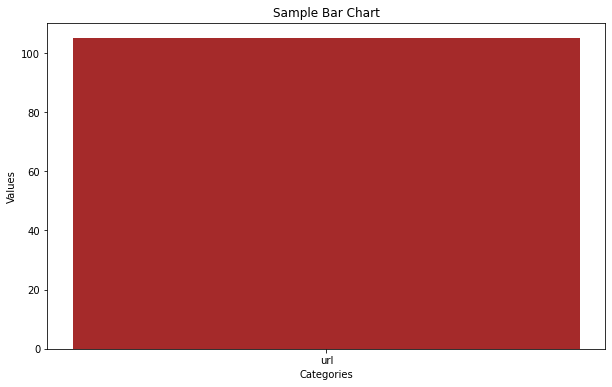

In [28]:
import matplotlib.pyplot as plt

# Sample data
categories = ['url']
values = [105]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='brown')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Display the bar chart
plt.show()

In [29]:
import pickle

In [31]:
# Save the model to a file
filename = r'C:\Users\nivet\Downloads\petsi project\malicious.pickle'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

In [32]:
import os
import pickle
if os.path.isfile(r"malicious.pkl"):
    print("File Exists")
else:
    pickle.dump(clf,open(r'C:\Users\nivet\Downloads\petsi project\malicious.pkl','wb'))
    print("Model Loaded!")

Model Loaded!
